In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def sample_tweets(df, num=10):
    print(len(df))
    if len(df) > 0:
        l = random.choices(df["clean"].tolist(), k=num)
        for sentence in l:
            print(sentence)

In [3]:
df = pd.read_csv("datasets/2021-2022/2021-2022_multi_dataset9.csv")
df

,tweet_id,date,text,name,username,userid,in_reply_to_tweet_id,in_reply_to_username,in_reply_to_userid,language,...,threat,sexual_explicit,davidson,hateval,jigsaw,qian,ethos,hateval2,average,ensemble
0,1007732116791136256,2018-06-15T21:10:34.000Z,I thought saying such things👇is #AntiSemitic 🤨...,Sonia Catarina,SoniaKatiMota,64781513,NaN,NaN,NaN,en,...,0.000571,0.000098,0.000718,0.029525,0.000684,0.001253,0.000222,0.026625,0.005900,0.307477
1,1027389165342797824,2018-08-09T03:00:39.000Z,🇨🇳☭ Thread about Socialism with Chinese Charac...,Katjo Buissink 🔻🕊️,proletarikat,722890990508318722,NaN,NaN,NaN,en,...,0.000031,0.000029,0.000773,0.002386,0.000438,0.000946,0.000476,0.025270,0.005581,0.306853
2,1049449309790322688,2018-10-08T23:59:47.000Z,Trump says something to Justice Kennedy that s...,Eleven Films,Eleven_Films,2570178294,NaN,NaN,NaN,en,...,0.000029,0.000021,0.000876,0.001560,0.000442,0.000999,0.000203,0.024097,0.005324,0.306379
3,1058411714150981632,2018-11-02T17:33:11.000Z,@aurabogado Too many Americans treat Halloween...,"Grand Masker Kushibo, MPH",kushibo,52423655,1.058406e+18,NaN,1.540763e+07,en,...,0.000147,0.000079,0.000846,0.004495,0.870706,0.003211,0.001323,0.020962,0.179410,0.555154
4,1122720545890377728,2019-04-29T04:33:31.000Z,I'm thrilled to see the #waleg pass I-1000 thi...,Governor Jay Inslee,GovInslee,1077214808,NaN,NaN,NaN,en,...,0.000019,0.000017,0.000765,0.000778,0.000431,0.000951,0.000105,0.008214,0.002093,0.300171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186507,935323286526971904,2017-11-28T01:43:43.000Z,FLASHBACK: Donald Trump's Congressional testim...,All In with Chris Hayes,allinwithchris,1286312880,NaN,NaN,NaN,en,...,0.000082,0.000116,0.000701,0.001140,0.011350,0.001190,0.000478,0.006215,0.003987,0.303164
186508,940615748988342273,2017-12-12T16:14:05.000Z,"Are you really trying to bully, intimidate and...",Elizabeth Warren,SenWarren,970207298,NaN,NaN,NaN,en,...,0.000456,0.047837,0.000728,0.003777,0.000480,0.992666,0.000198,0.523288,0.303472,0.840890
186509,947647976331079680,2018-01-01T01:57:38.000Z,2/3 QQ Alert has a VERY good track record with...,Naomi Wu 机械妖姬,RealSexyCyborg,3562121415,9.476464e+17,RealSexyCyborg,3.562121e+09,en,...,0.000022,0.000015,0.000703,0.001475,0.000436,0.001720,0.000162,0.006860,0.001976,0.299912
186510,954783118191484928,2018-01-20T18:30:09.000Z,Japanese internment was a land grab by white f...,Dr Sarah Taber,SarahTaber_bww,2859448331,9.547796e+17,SarahTaber_bww,2.859448e+09,en,...,0.000683,0.000142,0.031661,0.001363,0.560364,0.021414,0.004542,0.046183,0.132833,0.529378


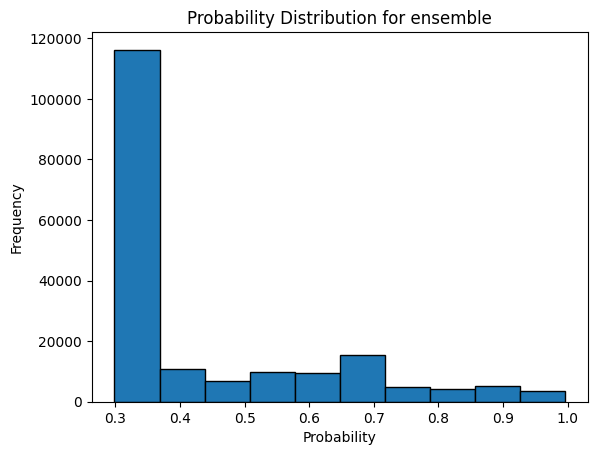

In [25]:
model = 'ensemble'
plt.hist(df[model], bins=10, edgecolor='black')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title(f'Probability Distribution for {model}')
plt.show()

In [26]:
totals = [len(df[df["ensemble"] > 0.9]),len(df[df["average"] > 0.5]), len(df[df["toxicity"] > 0.5]),len(df[df["identity_attack"] > 0.5]), len(df[df["davidson"] > 0.5]),len(df[df["hateval2"] > 0.8]),len(df[df["jigsaw"] > 0.5]) ,len(df[df["qian"] > 0.5]),len(df[df["ethos"] > 0.5])]
totals = np.array(totals)
percentages = totals / len(df)

names = ['Ensemble','Average','Detox Toxicity', 'Detox Identity Attack', 'Davidson', 'Hateval', 'Jigsaw', 'Qian', 'Ethos']
for i in range(len(percentages)):
    print(f'{names[i]} : {round(percentages[i],2)}')


Ensemble : 0.03
Average : 0.02
Detox Toxicity : 0.15
Detox Identity Attack : 0.02
Davidson : 0.02
Hateval : 0.1
Jigsaw : 0.09
Qian : 0.05
Ethos : 0.05


([<matplotlib.axis.XTick at 0x19c383eee00>,
 [Text(0, 0, 'DL Ensemble'),
  Text(1, 0, 'Average'),
  Text(2, 0, 'Detox Toxicity'),
  Text(3, 0, 'Detox Identity Attack'),
  Text(4, 0, 'Davidson'),
  Text(5, 0, 'Hateval'),
  Text(6, 0, 'Jigsaw'),
  Text(7, 0, 'Qian'),
  Text(8, 0, 'Ethos')])

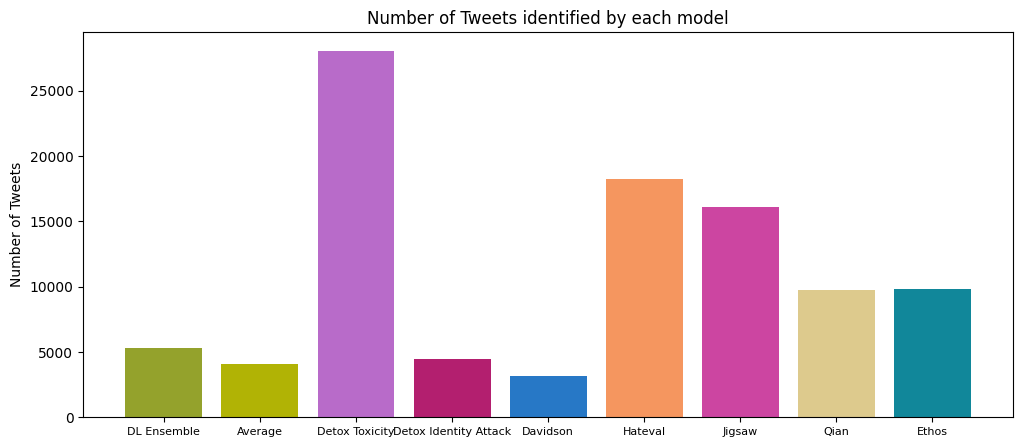

In [23]:
plot_data = [len(df[df["ensemble"] > 0.9]),len(df[df["average"] > 0.5]), len(df[df["toxicity"] > 0.5]),len(df[df["identity_attack"] > 0.5]), len(df[df["davidson"] > 0.5]),len(df[df["hateval2"] > 0.8]),len(df[df["jigsaw"] > 0.5]) ,len(df[df["qian"] > 0.5]),len(df[df["ethos"] > 0.5])]
colors = []
for _ in range(len(plot_data)):
    colors.append((random.random(), random.random(), random.random())) 

plt.figure(figsize=(12,5))
plt.bar(range(len(plot_data)),plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), ['DL Ensemble','Average','Detox Toxicity', 'Detox Identity Attack', 'Davidson', 'Hateval', 'Jigsaw', 'Qian', 'Ethos'], fontsize=8)

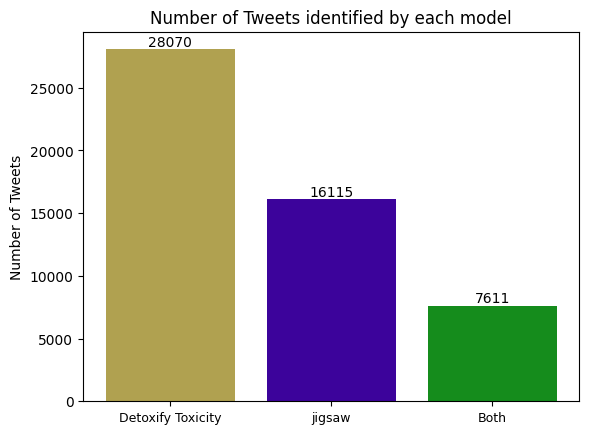

In [9]:
dataset1 = "toxicity"
dataset2 = "jigsaw"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), ["Detoxify Toxicity", dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [7]:
sample_tweets(df[(df[dataset1] > 0.6) & (df[dataset2] < 0.5)], num=20)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)], num=20)

17943
He needs to go first along with the rest of his lying nasty bullying egomaniacal evil hypocrites When will all of them go to jail for the many crimes and threats and lies they have committed Trash
The dumb one is Fredo von Eric
that s so fucked up
Garbage
It was a joke cupcake Technically Vampire is a race if you want to get pedantic about it but I was just going for silly and amusing
We are not as stupid as you to not know who he was implying with that last line
I can t stop laughing at this fucker getting punched I ve replayed this video so many times
keep trusting that crap that the government is pushing and the population will be reduced by half mRNA vaccine Still can get covid Myocarditis Blood clots Experimental mRNA Traditional vaccine Still can get covid I d rather take thx
You re a psychopath and you should be arrested
don t be a russky idiot like Kennedy
The time tocontrol it was the day it started He chose to sit on his ass and do no preparation or warning for 6 weeks 

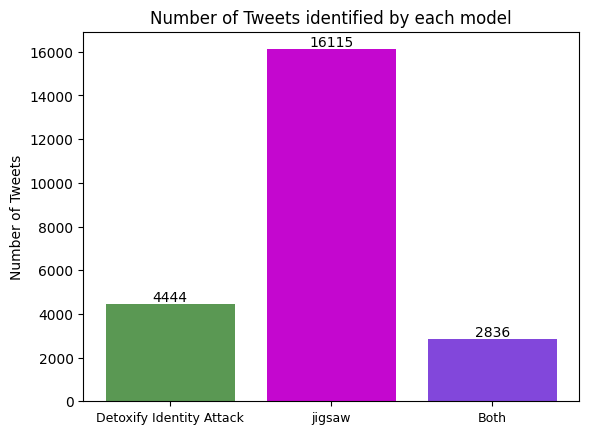

In [12]:
dataset1 = "identity_attack"
dataset2 = "jigsaw"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), ["Detoxify Identity Attack", dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [137]:
sample_tweets(df[(df[dataset1] > 0.6) & (df[dataset2] < 0.5)], num=20)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)], num=20)

899
The people here are saying the kid is black
God is revealing and removing a good many fake Christians
Biden supporters murdering Asians
Americans often only support on Twitter stupid Americans
No the White women are too hateful I keep my distance Something very wrong with their humanity
I really don t hate Asian people
It s funny tho When white people ask why BLM isn t tearing Chicago apart due to the black on black murder plague they are called racist We can t care about that but must for every missing person
They re some more black faces of white supremacy
This is a symptom not disease cause The real cause is Chinese are racist and often insult Blacks INDIANS AFRICANS We are here focussing only on symptom
I also hate asian and the way they study more than me
There is no notable increase in violence against asians Check the stats over the past several years This is OPs passion the hatred of black men
Damn better tell my asian friends that it wasn t obviously a black man that punch

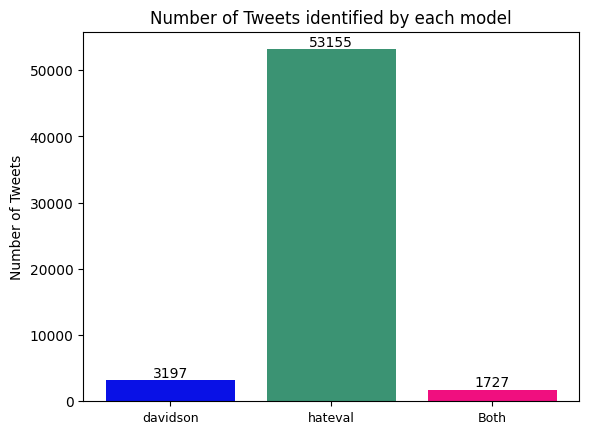

In [106]:
dataset1 = "davidson"
dataset2 = "hateval"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]


# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [107]:
print(sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20))

351
people of color don t exist folks is a herderian concept the volksgeist the same concept invoked in the dehumanizing worldview of the nazis some people have disabilities they don t belong to a community or identity called disabled people
This isn t about hating all Asians but pointing out the open hatred they have for black people kn the past and today
Nothing they said would make this appropriate unless you re ghetto trash just like them
White man who created death wars and slavery it s a group of 5 white man that work for the black nobility under the United Nations who are pushed policy s worldwide everyone else is a servant including the presidents and congress No one wants to WAKEUP and stand together
What the hell are you talking foreigner
Anti white to the core They hate white civilization and condemn it just for existing
It s horrible that you are being targeted by these hateful sorry excuses for human beings Every one of us decent people needs to lend you our full support m

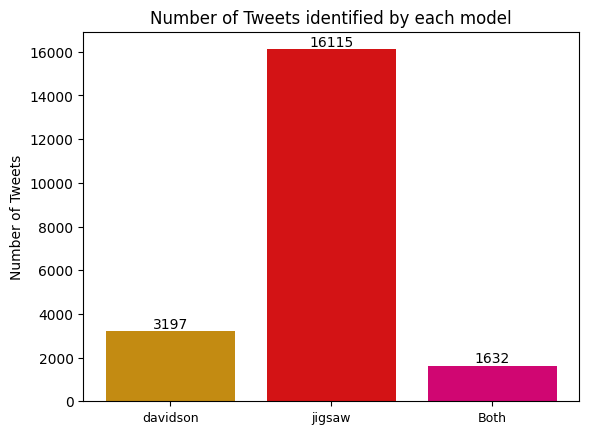

In [13]:
dataset1 = "davidson"
dataset2 = "jigsaw"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [16]:
sample_tweets(df[(df[dataset1] > 0.6) & (df[dataset2] < 0.5)], num=20)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)], num=20)

1349
So what if we fought back against black violence You know what happens We go to jail and we lose our jobs Youre privileged you re coddled and you are protected It s embarrassing really
Yet you still believe them Tell me who was profiting from the crack that destroyed the black communities I ll give you a hint it starts with Bill and ends with Clinton
You act like this is the only example The fact is racist behaviors come from every group No group is defined by its worst members
What I DON T agree with is the harmful misconception that asians benefit off white supremacy which the other person said Theres a reason why I only responded to the other person s comment and left yours alone
hate to break it to you but i m not a trumper i just don t like elite white men with the means to take their kids to private school shut down public schools and then offer no alternatives for the working class but i m sure it doesn t matter to you tho
When the Campaign came out on the heels of people d

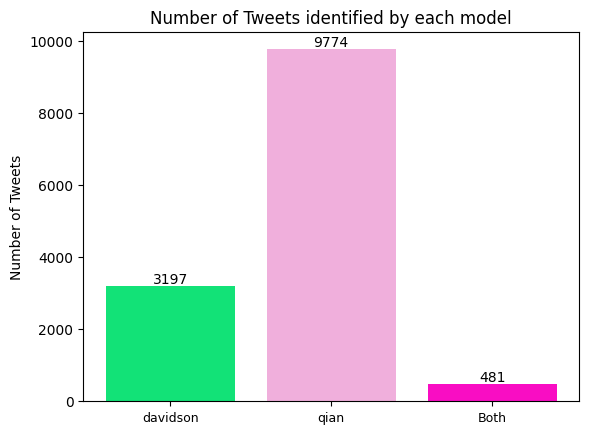

In [17]:
dataset1 = "davidson"
dataset2 = "qian"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [25]:
sample_tweets(df[(df[dataset1] > 0.6) & (df[dataset2] < 0.5)], num=20)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)], num=20)

2315
I don t understand why you take cries for removal of social injustices as an accusation against white people How does that mess up everyone s lives Just because you think in generalizations doesn t mean we all do You need to check your biases
Ryan will be a GREAT addition to the diversity of Austin a normal White guy
You re missing the bigger picture and your facts are wrong Black people are not to blame for the vast majority of AAPI hate crimes In fact they are underrepresented White assailants make up 75 of all reported crimes The issue is white supremacy Not the Black community
Of course everthing is free in america including racial discrimination and assaulting
Threats against women and femicide has gone up exponentially Sadly Asian Americans have been targeted more
another old ass white man throwing a tantrum because poc and lgbtq people are represented in a kid s show GET OVER IT WE EXIST
Boy You re a confused human aren t you The fbi site proves that y all commit the most h

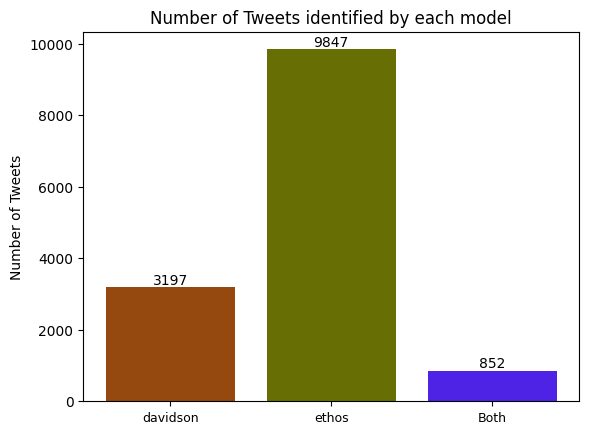

In [116]:
dataset1 = "davidson"
dataset2 = "ethos"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [117]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20)

571
I remember when the MEDIA was making it out that the Whites were attacking Asians Then asian women on my timeline so quick to denounce that but not when it s blacks doing the crime not a peep Wanna just denounce ALL HATE and keep it 100
Surely you could expand your vocabulary parrot
As a matter of fact what do you have to say about this image anti black Hate perpetuated by the Asian community
Mass extinction of racist white men like and all those who took part in writing that blatantly racist script please That s it that s the tweet
They aren t the same Don t see this happening to white people
White supremacy
3 stupid losers
The most hateful racist language I have ever heard in my life was on a subway N word a lot anti Semitism A LOT in NYC I have lived my entire life in TX except 2 years in OK during the 80 s oil boom
It s because the criminals aren t white
Everything in your statement is false respectfully
What do you mean by they are white when seeking admission to universities


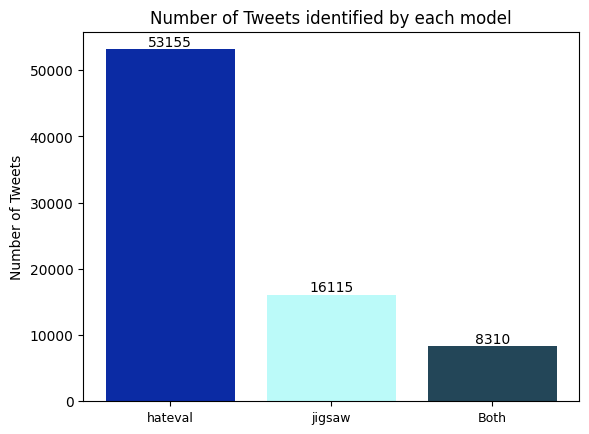

In [118]:
dataset1 = "hateval"
dataset2 = "jigsaw"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [120]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20)

34907
If only we could just cordon off all the poor people Just throw them in jail where young miscreants get indoctrinated into a life of crime Thanks for your ideas
Id be fairly certain the robber didn t carr about the ethnicity of the person wearing the rolex
Jim caldwell is the most successful coach in last 50 years in detroit and hasn t gotten a job mind u he coached in super bowl and help flacco win his
The rioters were loud and violent and included military police firemen sherrifs and Trump appointees
We Thrive Divided We Fall 4 AnyThing
Makes no sense while all your fans will literally be seated watching your boring team defend the whole game without a shot on target
It is critically important for this Administration to move on EVERYTHING I the coming months
And Native Americans are as much Asian or East Asian than White people are African because if you want to go back up to 50 000 years ago or more everybody is from Africa And if you would read your article it s Siberian peop

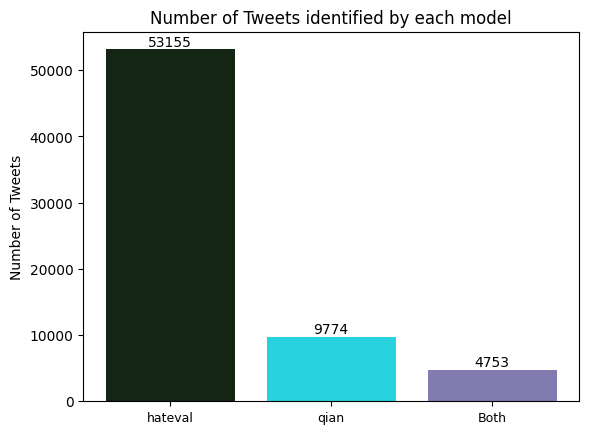

In [121]:
dataset1 = "hateval"
dataset2 = "qian"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [122]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20)

37819
Another of Kentucky s finest Why do we keep electing these lousy politicians I m not a part of it trust me
Policy has nothing to do with black underperformance They underperform on every level regardless of economic success The only thing they over perform is in violent crime We spend billions trying to change this and the only solution we have found is to just turn a blind eye
Following please follow back
True enough And McConnell will smirk just as he did when asked if he would fill a SCOTUS seat in Trump s last year
Welcome to being Italian 100s years ago they hung us and denied us jobs but ya know no reparations cause we re white now
I have trust issues too But if they are indicted and found guilty they need to go to a normal prison no special ones
BTS hope we soon
Let s all cancel and harass her That s the only way to chance this horrible culture
What happened to Christina Yuna Lee is utterly heartbreaking Hate crimes against Asian Americans must end now Speechless
The GQP w

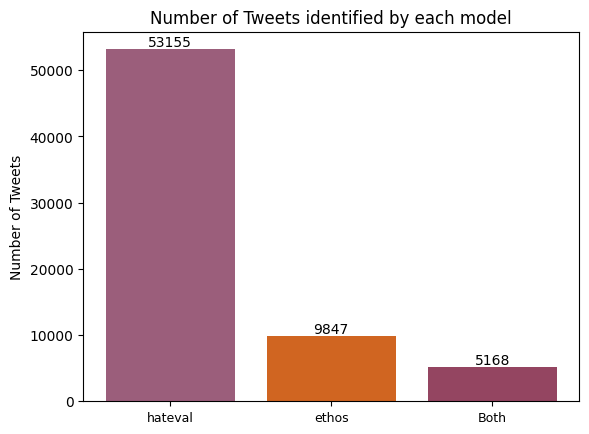

In [123]:
dataset1 = "hateval"
dataset2 = "ethos"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [124]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20)

37401
thank you im so proud of you
And no one will see a thing
Black Lives Matter up until Democrats keep fighting to be able to abort them The current Democrats are doing the work of the original Democrat Slave Masters Fetal People 1 Birthing People 0
In these polarized times we have an issue that 70 80 of Americans agree on where again we lag behind the rest of the developed world Manchin squashed it
Most of criminal were black most of the Asian were targeted harresed by black
What s the beef between Black s and Asians
Sorry no it does not Brown is a US centric term that has no meaning in Asian circles This is a Korean drama and the character is a Pakistani Him having brown skin has little to do with what we re talking about and you re refusing to listen
History should always be taught in schools and colleges no matter how ugly it is so everyone can learn from it I m an educator and I m fearful of what republican governors are doing now trying to erase history in the classroom Everyo

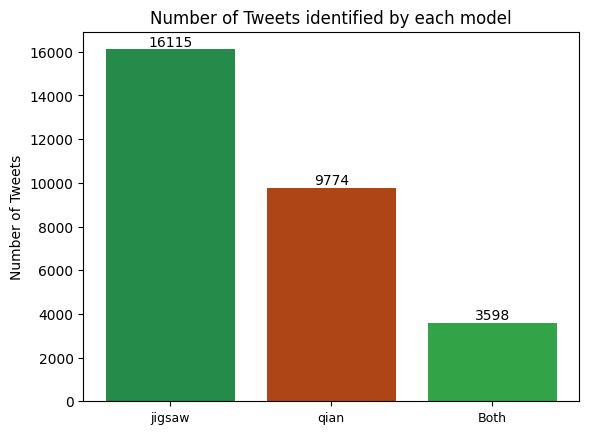

In [125]:
dataset1 = "jigsaw"
dataset2 = "qian"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [129]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)], num=20)

8916
Tell that to looney leftist mob who created this chicanery
Dog bites man racist act in racist nation
Xenophobic jokes are NOT funny
You make racial slurs against Asians and talk violence AKA I would love to see you say that to my face but you ain t a real man but a coward behind a computer
You should make a verbal apology for what you said about white people you re exactly the meaning of racist Asshole
Don t try to miss the point JB these blacks are sad as f
Do you have ADHD or something The topic of our conversation the exact reason why I confronted you in the first place is your racist rhetoric If you truly are not racist against Asians you are an illiterate idiot for not seeing how you re being offensive to Asian Americans
Newt is the reason I stopped being a Republican He is Satan incarnate
Like hell it is Racism is not in the genes It is taught Even Oscar Hammerstein the 3rd knew that was true when he wrote the lyrics to You ve Got To Be Carefully Taught SOUTH PACIFIC 1958 vi

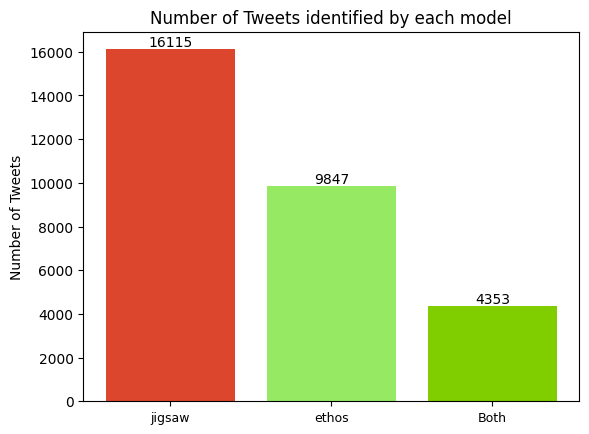

In [130]:
dataset1 = "jigsaw"
dataset2 = "ethos"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [132]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)], num=20)

8273
Anglo American xenophobia and hate against Chinese will have dangerous consequences Like Nazi Germany s xenophobia and hate against Jews will result in their own destruction
MANCHIN wants to run for President and thinks HE CAN DO IT BY SABOTAGING BACKSTABBING CURRENT PRESIDENT WATCHING YOU GO DOWN IN FLAMES
Racist
What the hell are you trying to say That because of slavery in the past this racist is ok
Wtf are you talking about When it s a white person they show the picture immediately You dumb troll
Yes Now let s move toward direct anti racist actions Also next up perhaps comments on describing homosexuality as a mental illness
u make me so so Proud
That s what they use to say about Jews Ask Arabs nowadays if Jews fight back I think they ll give you a very different answer
Kennedy Irish name right England didn t want them so they went to America seeking asylum and America accepted them They obviously forgot where they came from Typical Republican I ve got mine screw you
Cording t

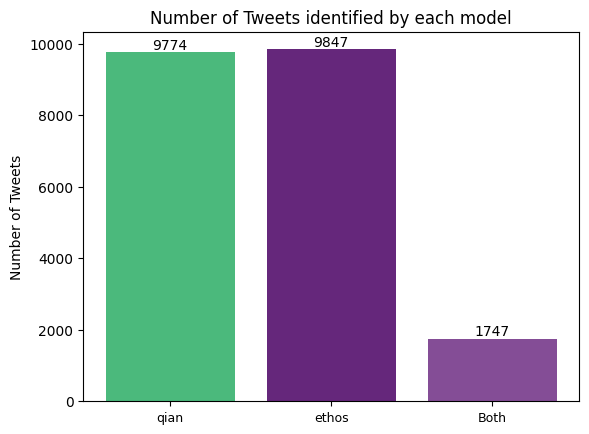

In [133]:
dataset1 = "qian"
dataset2 = "ethos"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [134]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)], num=20)

6000
Fucking stupidity You people
is a tone deaf shitbird
Stand united
He didn t hesitate to speak on Jewish hate crime Lol that dumb ass Didn t you even think about what you said dumb ass
And this explains anti Asian attacks in areas dominated by groups other than Black people how You found six knuckleheads You completely missed the point
I know reading is hard but no one said anything about playing with them You can dunk deez nuts in your mouth
Corny
I am a HUGE Elon Tesla SpaceX fan It was generally the phrases in there that are hurtful unfortunately used But it s not just at work it s also all over social media and it s not one nationality or race And it s never acceptable ya know
I blame White people
There goes white fragility again always whining any time anyone recounts a negative personal experience
Note I don t actually hate furries I am a furry but this guy is a dumb fucking bitch
Matt Gaetz and Tucker Carlson are the few honest people around anymore
Rightoids Get out of your

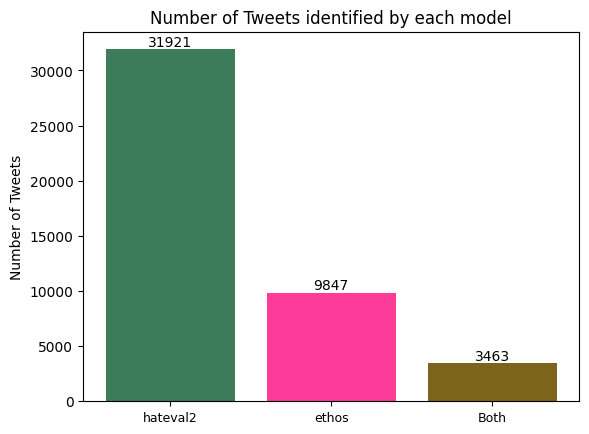

In [4]:
dataset1 = "hateval2"
dataset2 = "ethos"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [5]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=20)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)], num=20)

10188
Remember taxpayers are democrats and republicans And we are paying this witch to hold rallies on our time Time to clock that witch
I wish you wouldn t stop locking up so many poor and Black people You are the one who wants to lock people up
Hold
If the victim has produced a gun and shot her assailant she s be jailed on murder and illegal gun possession charges and the riots would be ongoing
Aww Don t pay attention to these useless trolls They get off on bugging people Just let your real friends know about it we will all report them as racial harassment
Is that going to stop mentally ill people prone to violence from stabbing people on the subway
We do not elect government officials to make us do their homework Collect information and serve Why are you forcing citizens to do the work We are busy people with work to do and lives to live
People are sick and twisted
Cowardly but the smart thing to do Had they struck back this would have been reported as Asian men beating black girls 

In [6]:
df["average"] = df[["jigsaw", "hateval2", "davidson", "ethos", "qian"]].mean(axis=1)

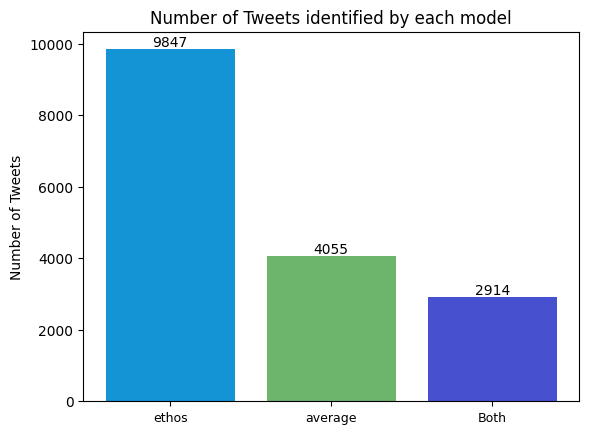

In [13]:
dataset1 = "ethos"
dataset2 = "average"
plot_data = [
    len(df[df[dataset1] > 0.5]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.5) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

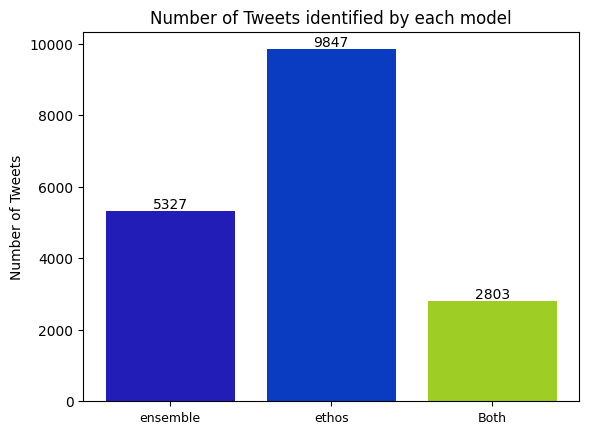

In [45]:
dataset1 = "ensemble"
dataset2 = "ethos"
plot_data = [
    len(df[df[dataset1] > 0.9]),
    len(df[df[dataset2] > 0.5]),
    len(df[(df[dataset1] > 0.9) & (df[dataset2] > 0.5)])
]
colors = [ (random.random(), random.random(), random.random()) for _ in range(len(plot_data)) ]

# plt.figure(figsize=(12,5))
bars = plt.bar(range(len(plot_data)), plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets identified by each model")
plt.xticks(range(len(plot_data)), [dataset1, dataset2, 'Both'], fontsize=9)

# Annotate bars with counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [43]:
sample_tweets(df[(df[dataset1] > 0.9) & (df[dataset2] < 0.5)], num=10)
print("-----------------")
sample_tweets(df[(df[dataset2] > 0.9) & (df[dataset1] < 0.5)])

3878
Again saying hateful things while wearing a cross What a Faux Christian please take off the cross It s sacrilegious
I m not Hispanic I m native indigenous of the Andes mountains I have nothing against blacks but I m growing an anti Chinese sentiment They will rule the world in the near future being a Totalitarian country
Here comes another supporter of oppressors Do you want these girls to be forced a black garb throughout their lives Quran doens t mention any such compulsions for Sikhs it is a compulsion hence honoured by law Read b4 going bat shit woke
She s a frigin Communist people should be more worried about that
How is this a racial hate crime Anyone walking out of jewelry store in a Democrat run city is a target Plain and simple Don t look for racism look for better elected officials
They don t care because mostly blacks are doing the crime against Asians If all whites did it it be headline news Right
Asians were using gun powder to shoot fireworks in celebration It wasnt 